A continuação apresento a curva de luz normalizada com menor **rms** obtida com o polyfit (out_lc_from_p_ra_poli_g3_f1.dat), antes de aplicar a media deslizante.

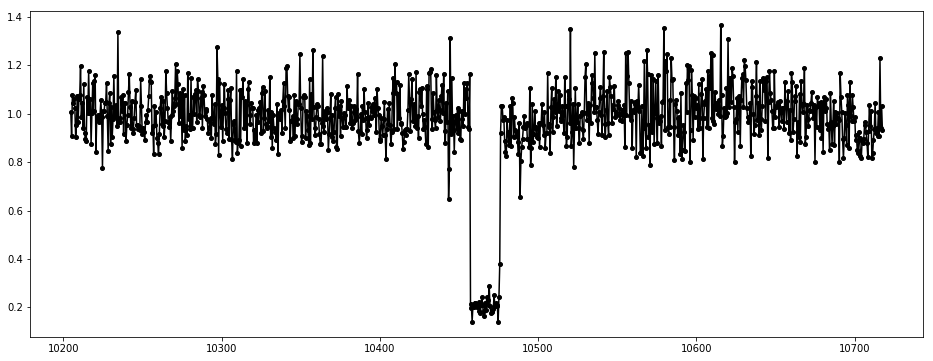

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_table('out_lc_from_p_ra_poli_g3_f1.dat',sep='\s+', header=None)
#df.describe() # mostra a estadistica das colunas
fig = plt.figure(figsize=(16,6))
plt.plot(df[0], df[1], 'ko-', color='black', markersize=4) 
# df[0]: tempo
# df[1]: fluxo
plt.show()

### Resultados de aplicar a media deslizante

O pandas de python permite aplicar a media deslizante com o seguinte comando. 

df[2] = df[1].rolling(window=2,center=False).mean()

Ele cria uma nova coluna df[2] com os valores da media deslizante. 

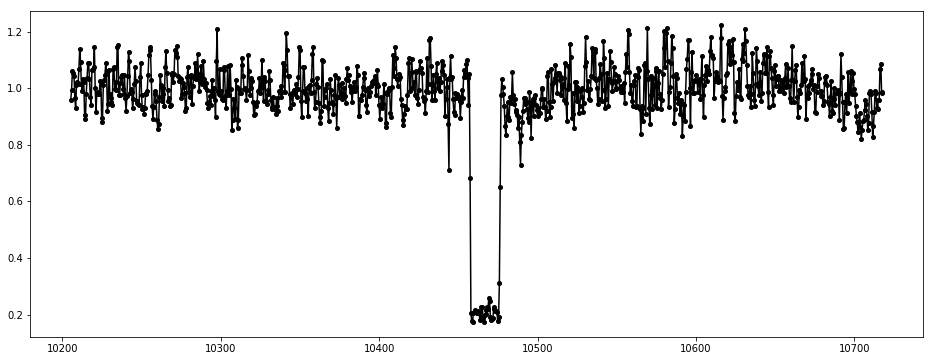

In [107]:
# tomando em comta dois pontos (windows = 2)
df[2] = df[1].rolling(window=2,center=False).mean()
fig = plt.figure(figsize=(16, 6))
plt.plot(df[0], df[2], 'ko-', color='black', markersize=4)
plt.show()

A continuação mostro a superposição da curva original e a curva obtida com a media deslizante para dois pontos

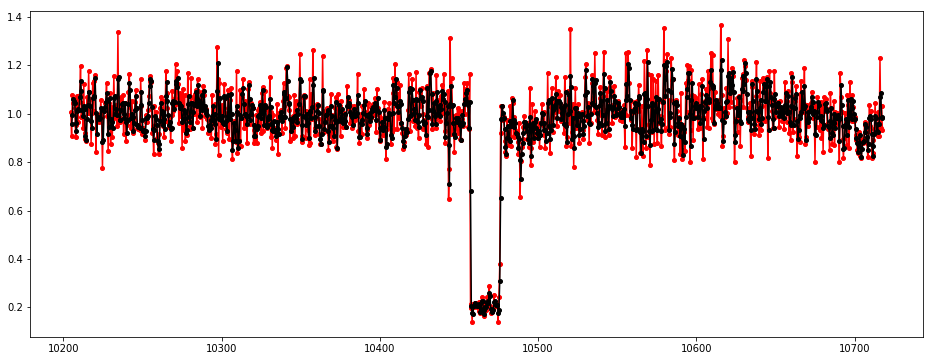

In [108]:
df[2] = df[1].rolling(window=2,center=False).mean()
fig = plt.figure(figsize=(16, 6))
plt.plot(df[0], df[1], 'ko-', color='red', markersize=4) # original
plt.plot(df[0], df[2], 'ko-', color='black', markersize=4)   # com media deslizante
plt.show()

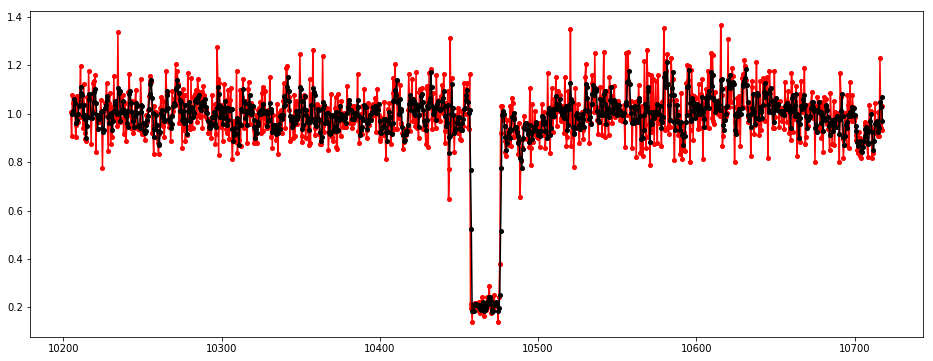

In [109]:
# tomando em comta treis pontos (windows = 3)
df[2] = df[1].rolling(window=3,center=False).mean()
fig = plt.figure(figsize=(16, 6))
plt.plot(df[0], df[1], 'ko-', color='red', markersize=4) # original
plt.plot(df[0], df[2], 'ko-', color='black', markersize=4) # media deslizante
plt.show()

Da figura pode-se ver que a media deslizante com treis pontos afeta a sinal do anel.

# Media deslizante para 5 pontos

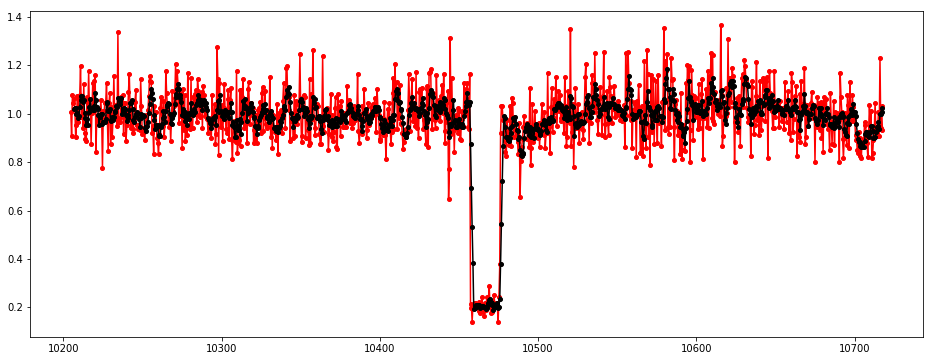

In [110]:
# tomando em comta treis pontos (windows = 5)
df[2] = df[1].rolling(window=5).mean()
fig = plt.figure(figsize=(16, 6))
plt.plot(df[0], df[1], 'ko-', color='red', markersize=4) # original
plt.plot(df[0], df[2], 'ko-', color='black', markersize=4) # media deslizante
plt.show()

Pode-se ver que para 5 pontos os aneis já não são percibidos

# Media deslizante com o peso do sigma

$$ \frac{(P1+P2)}{(2*\sigma)}= \frac{media}{\sigma}$$


0.031164023786491354


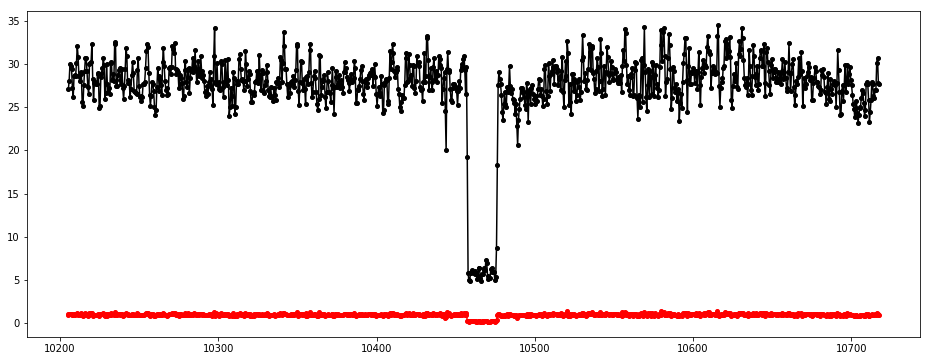

In [111]:
# para 2 pontos
c = (df[1].mean()/1000)**0.5 # sigma
print(c)
df[3] = df[1].rolling(window=2).mean() # media
df[4] = df[3]/0.035471250525172658
fig = plt.figure(figsize=(16, 6))
plt.plot(df[0], df[1], 'ko-', color='red', markersize=4) # original
plt.plot(df[0], df[4], 'ko-', color='black', markersize=4) # media deslizante
plt.show()

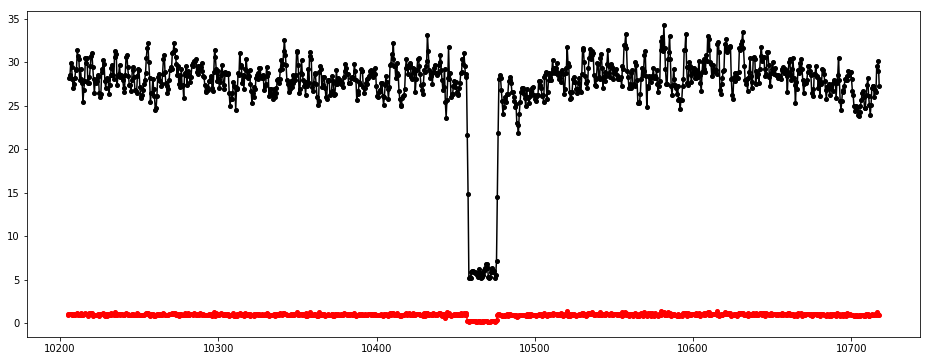

In [112]:
# para 3 pontos
df[2] = df[1].rolling(window=3).std(ddof=0) # sigma
df[3] = df[1].rolling(window=3).mean() # media
df[4] = df[3]/0.035471250525172658
fig = plt.figure(figsize=(16, 6))
plt.plot(df[0], df[1], 'ko-', color='red', markersize=4) # original
plt.plot(df[0], df[4], 'ko-', color='black', markersize=4) # media deslizante
plt.show()

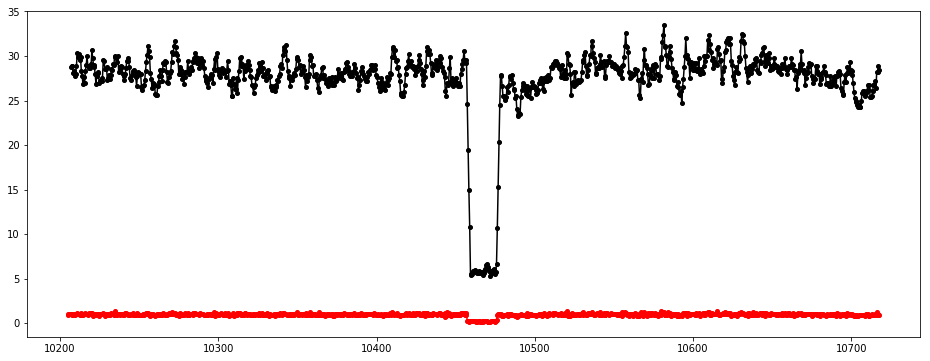

In [113]:
# para 5 pontos
df[2] = df[1].rolling(window=5).std(ddof=0) # sigma
df[3] = df[1].rolling(window=5).mean() # media
df[4] = df[3]/0.035471250525172658
fig = plt.figure(figsize=(16, 6))
plt.plot(df[0], df[1], 'ko-', color='red', markersize=4) # original
plt.plot(df[0], df[4], 'ko-', color='black', markersize=4) # media deslizante
plt.show()

# Aplicando a media deslizante no arquivo de saída do PRAIA_photometry

Aplicando a media deslizante sobre as colunas de fluxo (8, 11, 14, 17) das estrelas calibradoras do arquivo ***photo_char_final_lightcurve.dat***. Só para comparar eu fiz o promedio do fluxo das calibradoras e apliquei a media deslizante. No segundo caso, eu apliquei a media deslizante sobre cada uma das calibradoras e depois eu fiz o promedio.
Em ambos casos o resultado foi o mesmo como se mostra no plot.

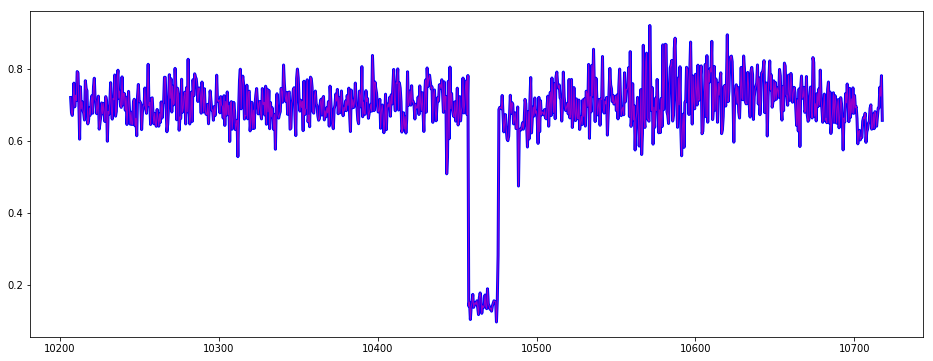

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
points = 5
df = pd.read_table("photo_char_final_lightcurve.dat", sep="\s+", header=None) # reading file photo_char_final_lightcurve.dat
# time in seconds
df[20] = (df[2] - 2457989.5) * 24 * 3600
# media deslizante sobre os promedio
df[21] = (df[7] + df[10] + df[13] + df[16])/4
df[22] = df[21].rolling(window=points).mean()
# media deslizante sobre as calibradoras
df[23] =  df[7].rolling(window=points).mean() 
df[24] = df[10].rolling(window=points).mean()
df[25] = df[13].rolling(window=points).mean()
df[26] = df[16].rolling(window=points).mean()
df[27] = (df[23] + df[24] + df[25] + df[26])/4
# plot 
# defining of size of plot
fig = plt.figure(figsize=(16, 6))
# Plotting
plt.plot(df[20], df[4]/df[22], 'b-', ms=2, lw=3.0) # rolling mean over calibrators star
plt.plot(df[20], df[4]/df[27], 'm', ms=2, lw=1., alpha=0.8) # rolling mean over each column and then average
plt.show()
#df[22]

O seguinte plot mostra a curva de luz (azul) quando é aplicado a media deslizante, e a curva de luz (vermelho) sim a aplicação da media deslizante  

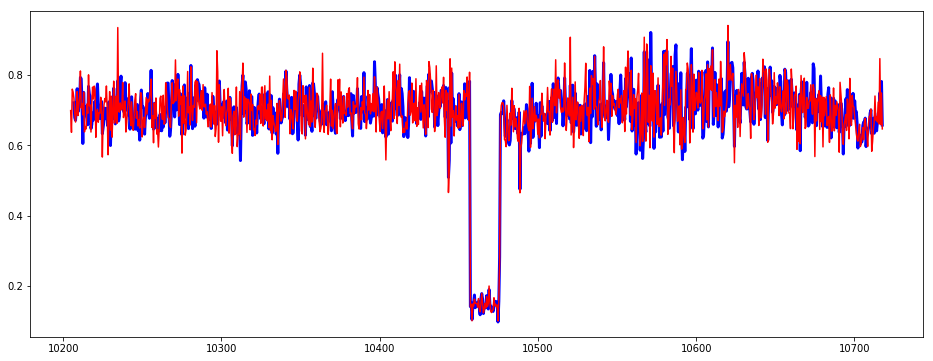

In [115]:
fig = plt.figure(figsize=(16, 6))
plt.plot(df[20], df[4]/df[27], 'b', ms=2, lw=3.) # rolling mean over each column and then average
plt.plot(df[20], df[4]/df[21], 'r-', ms=2, lw=1.5) # original
plt.show()

# Usando a formula dada pelo Julio

Só para fazer a comparação, emseguida se mostra os resultados com a formula fornecida pelo Julio

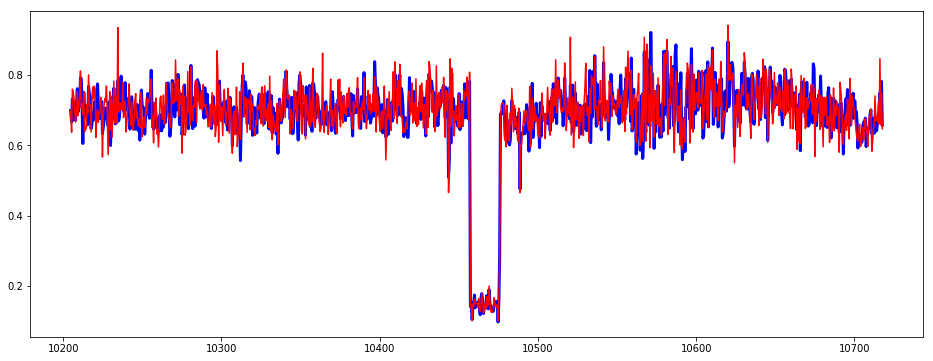

In [116]:
! awk 'BEGIN{size=5} {mod=NR%size; if(NR<=size){count++}else{sum-=array[mod]};sum+=(($8+$11+$14+$17)/4);array[mod]=(($8+$11+$14+$17)/4); print ($3-2457989.5)*24*3600, $5, ($8+$11+$14+$17)/4, sum/count}' photo_char_final_lightcurve.dat > teste.dat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

teste = pd.read_table("teste.dat", sep="\s+", header=None)
fig = plt.figure(figsize=(16, 6))
plt.plot(teste[0], teste[1]/teste[3], 'b-', ms=5, lw=3.0) # media deslizante
plt.plot(teste[0], teste[1]/teste[2], 'r-', ms=2, lw=1.5) # original
plt.show()
#teste[3]

Pode-se ver que que tanto com a ferramenta de python e o codigo fornecido pelo Julio, produz o mesmo resultado

# A continuação mostra-se os resultados da fotometria utilizando a configuração do PRAIA_photometry.dat usado pelo Julio. 

Para fazer a fotometria ele considera só três estrelas de calibração

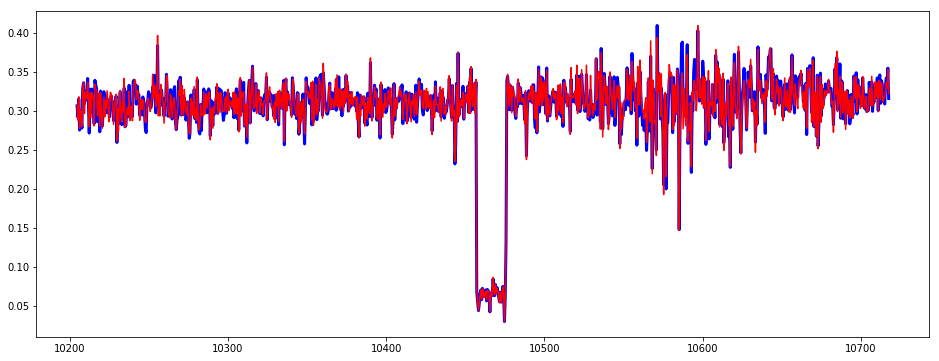

In [117]:
! awk 'BEGIN{size=5} {mod=NR%size; if(NR<=size){count++}else{sum-=array[mod]};sum+=(($8+$11+$14)/3);array[mod]=(($8+$11+$14)/3); print ($3-2457989.5)*24*3600, $5, ($8+$11+$14)/3, sum/count}' photometry_Chariklo_2017Ago23.dat > teste_julio_config.dat
result = pd.read_table("teste_julio_config.dat", sep="\s+", header=None)
fig = plt.figure(figsize=(16, 6))
plt.plot(result[0], result[1]/result[3], 'b-', ms=2, lw=3.0) # media deslizante
plt.plot(result[0], result[1]/result[2], 'r-', ms=2, lw=1.5) # original
plt.show()

Para o seguinte plot foi considerado uma estrela a mais com respeito á configuração anterior (4 estrelas de calibração). 

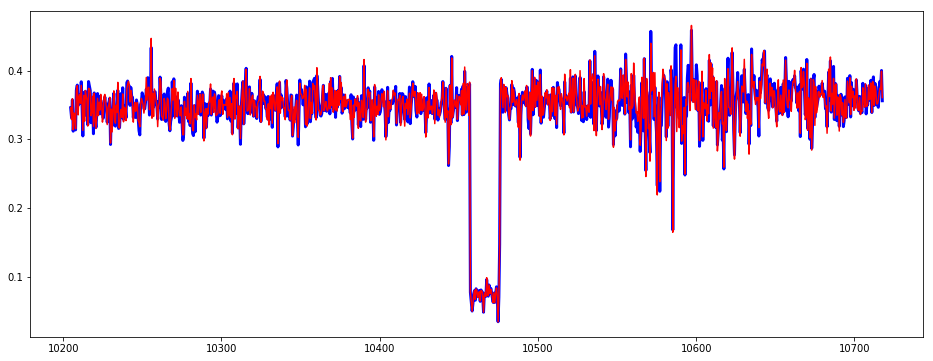

In [6]:
! awk 'BEGIN{size=5} {mod=NR%size; if(NR<=size){count++}else{sum-=array[mod]};sum+=(($8+$11+$14+$17)/4);array[mod]=(($8+$11+$14+$17)/4); print ($3-2457989.5)*24*3600, "\t ",$5,"\t ", ($8+$11+$14+$17)/4, "\t ", sum/count,"\t ", $8,"\t ",$11,"\t ",$14,"\t ", $17}' photometry_Chariklo_2017Ago23_4_calib.dat > teste_julio_config_4_calib.dat
result1 = pd.read_table("teste_julio_config_4_calib.dat", sep="\s+", header=None)
fig = plt.figure(figsize=(16, 6))
plt.plot(result1[0], result1[1]/result1[3], 'b-', ms=2, lw=3.0) # media deslizante azul
plt.plot(result1[0], result1[1]/result1[2], 'r-', ms=2, lw=1.5) # original rojo
plt.show()
df2polyfit = pd.concat([result1[0], result1[1]/result1[3]], axis=1)
np.savetxt(r'file2polyfit.txt', df2polyfit.values, fmt='%1.5f', delimiter='   ')

O seguinte plot mostra o comportamento dos fluxos das estrelas calibradoras

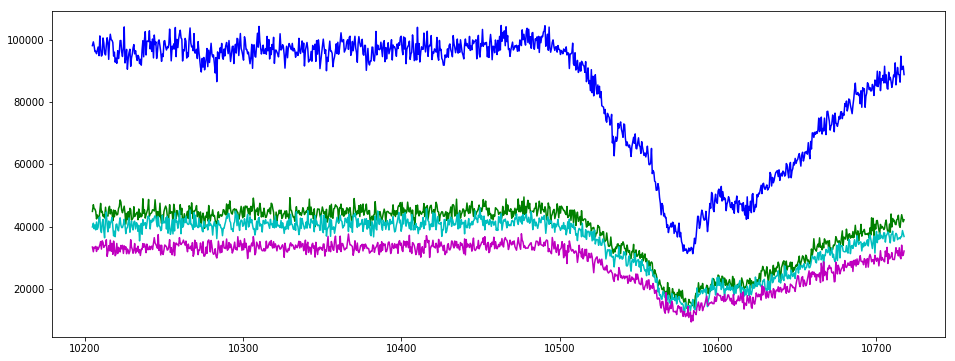

In [119]:
result1 = pd.read_table("teste_julio_config_4_calib.dat", sep="\s+", header=None)
fig = plt.figure(figsize=(16, 6))
plt.plot(result1[0], result1[4], 'b-', ms=2, lw=1.5)
plt.plot(result1[0], result1[5], 'g-', ms=2, lw=1.5)
plt.plot(result1[0], result1[6], 'c-', ms=2, lw=1.5)
plt.plot(result1[0], result1[7], 'm-', ms=2, lw=1.5)
plt.show()

# Polyfit

Aplicando o polyfit sobre o arquivo *file2polyfit.txt*

**polinomio grau 1**

Os arquivos gerados são:

*tr_poli_julio_config_calib4_g1.dat*

*da_poli_julio_config_calib4_g1.dat*

*ra_poli_julio_config_calib4_g1.dat*

**rms** = 2.1134968321760997E-002

**polinomio grau 3**

Os arquivos gerados são:

*tr_poli_julio_config_calib4_g3.dat*

*da_poli_julio_config_calib4_g3.dat*

*ra_poli_julio_config_calib4_g3.dat*

**rms** = 2.1129391562802035E-002

O arquivo *point_to_polyfit.dat* contém os pontos utilizados para aplicar o polyfit 

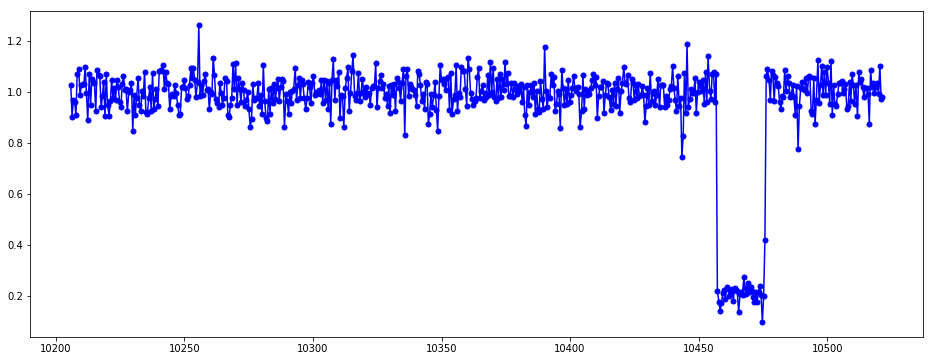

In [155]:
fig = plt.figure(figsize=(16, 6))
nor_light_curve = pd.read_table(''ra_poli_julio_config_calib4_g3.dat'', sep='\s+', header=None)
plt.plot(nor_light_curve[0], nor_light_curve[1], 'b-o', ms='5', lw='1.5')
plt.savefig("final_light_curve.svg")
plt.show()

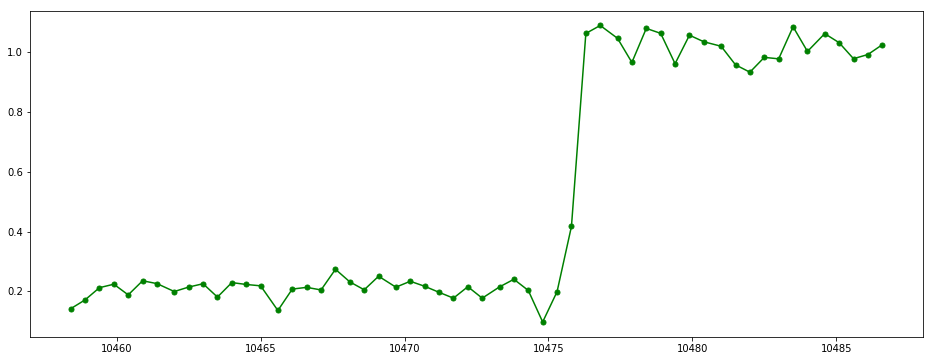

In [160]:
fig = plt.figure(figsize=(16, 6))
#nor_light_curve = pd.read_table('ra_poli_julio_config_calib4_g3.dat', sep='\s+', header=None)
emersao = pd.read_table('~/Documents/photo_char_occu/Emersã0/emersao.dat', sep='\s+', header=None)
#plt.plot(nor_light_curve[0], nor_light_curve[1], 'b-o', ms='5', lw='1.5')
plt.plot(emersao[0], emersao[1], 'g-o', ms='5', lw='1.5')
plt.savefig("emersao.svg")
plt.show()

# Instantes de immersão e emersão

Seguidamente (Em seguida) são apresentados os parametros necessarios para a determinação de tempo de imersão e emersão.

## Coordenadas do sitio de observação 

Longitude : -45° 34' 57"

Latitude : -22° 32' 04" 

## Tempo de exposição 

0.5 s

## Magnitude da estrela 

Esta informação serã necessaria para determinar o diametro da estrela que será utilizada posteriormente para incluir o efeito de difração de fresnel sobre a curva sintética que será construída para determinar os tempos de imersão e emersão.

Para determinar o diametro angular usamos as seguintes formulas 

$$\mathrm{\theta_{V} = 10^{\alpha_{V} + \beta_{V}(V - K) - 0.2 V}}$$ 

$$\mathrm{\theta_{B} = 10^{\alpha_{B} + \beta_{B}(B - K) - 0.2 B}}$$

### Pasos para obter a magnitude da estrela

1.- Ir para o link http://vizier.u-strasbg.fr/

2.- Selecionar opção portal

3.- Colocar a posição da estrela ocultada. Esta informação pode ser obtida da mapa de predição da ocultação. Por exemplo para nosso caso 

RA = 18 42 35.2284 &emsp; DE = -31 09 50.675

4.- Selecionar o **NOMAD catalogues (Zacharias+ 2005)** no item catalogues da pagina, E clikar a opção **Quickview** e de ahi pode ser obtida a magnitude da estrela como se mostra enseguida.

Para nosso caso tem os seguintes valores:

B = 17.63 &emsp; V = 17.61 &emsp; K = 15.164

Para obter o diametro usamos o programa ***diam***

$ diam < diam.i

atraves do diam.i são fornecidas as magnitudes e a distancia

1 17.6300&emsp;17.6100&emsp;15.1640                                                                                               
2 2252229343.400

### Velocidade da estrela

-12.55 km/s

### Distância ao objeto (Chariklo)

A distância ao objeto pode ser tirado do JPL https://ssd.jpl.nasa.gov/horizons.cgi#results selecionando a opção 20 (Observer range & range-rate) em Table Settings. O valor da distância é mostrado na coluna com label **delta**.

D = 2.2522293434E+09

## Tempo a priori

Tempo de immersão = 10457

Tempo de emersão = 10476



# Configuração de bar.i para determinar o tempo de Immersão e Emersão
## Emersão

**Mode:**

 -1= t0 for immersion
 
 +1= t0 for emersion
 
  0= t0 for the center of a square well
  
  2= two square well at a time

+1

**Exposure time:** (Tempo de exposição em segundos)

0.5

**Name of the file containing observations data (time x norm. flux):** (A melhor curva de luz normalizada)

ra_poli_julio_config_calib4_g3.dat

**Sigma of the observation:** (Este valor é obtido de aplicar o polifyt como foi mostrado acima)

2.1129391562802035E-002

**Time limits to fix the number of points to fit the model:** (Neste caso o fit será feito sobre a curva de cor verde como se mostra na figura) <img src="emersao.png">

10458 &emsp; 10487

**Wavelength? Filter (detector) wavelength width? (microns)**

0.75 &emsp; 0.4

**Distance geocentric-object ? Star radii ? (km)** (**Star radii** é calculado usando o programa **diam**) 

basicamente para calcular o Star radii se utiliza a seguinte formula 

&nbsp;

$$ \Theta_{v} = 10 ^ {\alpha_{V} + \beta_{V}(V - K) - 0.2 V} $$ 

&nbsp;

2.2522293434E+09 &emsp; 0.00492559

**Normal velocity of the star? (at the plane of the sky, km/s)**

12.55

**Width of the well (put 10000 or more if infinie, km)? Transmission (0 for opaque)?**

300 &emsp; 0

**Duration to analyse and step? (sec) (must be bigger than time interval above)**

240 &emsp; 0.125

**Stellar flux outside occultation, stellar flux during occultation?**

1.00 &emsp; 0.205133598675

**Reference instant? (sec)** (tempo de referencia de emersão)

10475.75

**Number of times to explore around reference time? (sec)** (the program will create 500 profiles, each one displaced 0.05 seconds from the previous. Each of those profiles will give a t0 and a $\chi^2$. The one with lower $\chi^2$ represents the best time adjust for the time of immersion/emersion.)

500 &emsp; 0.005

multiplicado o 500 por 0.005 da 2.5 o qual são 5 tempos de exposição (0.5), por tanto ele gera 500 perfis em torno do tempo de referencia colocada na linha anterior (10475.75), 250 perfis em 2.5 segundos antes do tempo e 250 perfis em 2.5 segundos depois do tempo. Depois da convergencia do tempo pode-se modificar este parametro e só considerar 3 pontos (1.5 seg).

1500 &emsp; 0.001

o qual corresponde a três pontos

**Sigma (0= sigma constant, 1= sigma proportional to signal)**

0

### Resultados de aplicar o bar para a emersão

t0, chi2 and nfit at minimum: 10475.9150 &emsp; 203.008 &emsp; 56

Dchi2, interval or chi2 < chi2_min + dchi2:  1.00 &emsp; 10475.905 &emsp; 10475.925

Result: t0 best = 10475.914999999801 +/- 9.99999978E-03

or: 02&emsp;54&emsp;35.915

## Immersão

Para determinar o tempo de immersão é feito o mesmo procedimento e foi utilizado a seguinte configuração

-1                                                                                                                                

0.5

ra_poli_julio_config_calib4_g3.dat

0.021129391562802035

10446 &emsp; 10475

0.75 &emsp; 0.4

2.2522293434E+09 &emsp; 0.00492559

12.55

300 &emsp; 0

250 &emsp; 0.125

1.00 &emsp; 0.205133598675

10457.112

500 &emsp; 0.005

0

### Resultados de aplicar o bar para a immersão

t0, chi2 and nfit at minimum: 10457.1120 &emsp; 284.753 &emsp; 57

Dchi2, interval or chi2 < chi2_min + dchi2:  1.00 &emsp; 10457.102 &emsp; 10457.122

Result: t0 best = 10457.111999999799 +/- 9.99999978E-03

or: 02 &emsp; 54 &emsp; 17.112

# Aplicando o programa positionv

Antes de aplicar o *positionv* é necessario ter a efemeride do corpo (horizons_results.txt)(As unidades de distância tem que estar em unidades astronomicas) e os seguintes programas compilados com seus correspondentes arquivos input, os programas são executados no seguinte ordem:

./gera_inputs < all_inputs.i

./diam < diam.i

./ephem_planete < ephem_planete.i (leva as posições dos observadores para o geocentro, para nosso caso só temos uma posição)

./fit_d2_xi_eta < fit_d2_xi_eta.i (calcula os coeficientes para o passo entre os planos tangentes no ceu visto do geocentro e do observador)


### Uma vez determinada uma nova velocidade com o positionv

#### Resultado obtido da salida apos aplicar o positionv (perguntar)
$immersão = 11.4153$  

#### Resultado obtido da salida apos aplicar o positionv (perguntar)
$emersão = 11.4152$ 

colocamos eses resultados no bar.i e rodamos o bar

### Emseguida são amostrados os novos resultados para o tempo emersão

t0, chi2 and nfit at minimum: 10475.9240    194.098    56

Dchi2, interval or chi2 < chi2_min + dchi2:  1.00  10475.908  10475.929

 Result: t0 best=   10475.918500000153      +/-   1.04999999E-02
 
or:        02 54 35.919

t0, chi2 and nfit at minimum: 10475.9240    194.098    56

Dchi2, interval or chi2 < chi2_min + dchi2:  9.00  10475.874  10475.950

 Result: t0 best=   10475.912000000151      +/-   3.79999988E-02
 
or:        02 54 35.912

 Fresnel scale (km):  0.919013619    
 
 Well width (perpendicular, km), transmission T at Earth level
 
 opacity p=1-sqrt(T) at the 'ring' plane:
 
   300.000000       0.00000000       1.00000000    
   
 sigma constant

### Emseguida são amostrados os novos resultados para o tempo imersão

t0, chi2 and nfit at minimum: 10457.0950    275.031    57

Dchi2, interval or chi2 < chi2_min + dchi2:  1.00  10457.082  10457.107

 Result: t0 best=   10457.094500000152      +/-   1.25000002E-02
 
or:        02 54 17.095

t0, chi2 and nfit at minimum: 10457.0950    275.031    57

Dchi2, interval or chi2 < chi2_min + dchi2:  9.00  10457.056  10457.134

 Result: t0 best=   10457.095000000152      +/-   3.90000008E-02
 
or:        02 54 17.095

 Fresnel scale (km):  0.919013619   
 
 Well width (perpendicular, km), transmission T at Earth level
 
 opacity p=1-sqrt(T) at the 'ring' plane:
 
   300.000000       0.00000000       1.00000000 
   
 sigma constant

## **Running Ellipse_fit**

## **Arquivo de entrada para o ellipse_fit**

*Arquivo obtido com o positionv, esse arquivo contem informação das posições de entrada e saída (\psi, \eta) no plano do cêu, TU en segundos e rho (perguntar o Gustavo) (fort.21: ksi, eta, TU_sec, rho)*

**fort.21** 

*Tipo de ajuste, 1 para uma ellipse, 2 para uma isopotencial*

**1** 

*Sigma associado a cada ponto? (em km, da direção RADIALE), you can calculate the associated sigma multiplying the error in time and the velocity.*

$$\mathrm{error\,\,in\,\,time\,\,\times\,\,velocity}$$

*Onde: error in time is obtido do bar (1.04999999E-02 para immersão e 1.25000002E-02 para emersão)* 

*Onde: velocity é obtido da salida do positionv (11.4153 para a immersão e 11.4152 para a emersão)*

*Immersão*

0.11986064885846999 $= \mathrm{1.04999999E-02\,\,\times\,\,11.4153}$

*Emersão*

0.14269000228304002 $= \mathrm{1.25000002E-02\,\,\times\,\,11.4152}$

1d-4

132 0

0 1000

0 1000

0 0

0 0

0

0.01

0.01

0

0

## Determinando os valores de $\xi$ e $\eta$ para o radio minimo e maximo do Chariklo.

Para $\mathrm{R = 122 km}$

$\mathrm{\xi_{min} = 222.090 \pm 0.180}$

$\mathrm{\eta_{min}= 550.143 \pm 0.390}$

Para $\mathrm{R = 132 km}$

$\mathrm{\xi_{max} = 237.883 \pm 0.190}$

$\mathrm{\eta_{max}= 584.494 \pm 0.340}$

### Determinando valor medio

\begin{equation}
\xi_{final} = \frac{\xi_{min} + \xi_{max}}{2} \pm \sqrt{\sigma_{min}^2 + \sigma_{max}^2}
\end{equation}

\begin{equation}
\eta_{final} = \frac{\eta_{min} + \eta_{max}}{2} \pm \sqrt{\sigma_{min}^2 + \sigma_{max}^2}
\end{equation}
<br />
$\xi_{final} = 229.9865 \pm 0.261725046566048$
<br />
<br />
$\eta_{final} = 567.3185 \pm 0.5173973328110613$

### Pasando para unidades angulares

$\theta_{\xi} = \arctan(\frac{\xi}{D}) = 1.0211504466628076e-07$

$\theta_{\eta} = \arctan(\frac{\eta}{D}) = 2.518919761268873e-07$

In [12]:
import numpy as np
# Para o \xi
print(np.arctan(229.9865/2252229343.4))
# Para o \eta
print(np.arctan(567.3185/2252229343.4))
# Para o sigma \xi
print(np.arctan(0.261725046566048/2252229343.4))
# Para o sigma \eta
print(np.arctan(0.5173973328110613/2252229343.4))

1.0211504466628076e-07
2.518919761268873e-07
1.1620710267940291e-10
2.2972675244075733e-10


In [13]:
# Pasando para segundos de arco
print(1.0211504466628076e-07*(360*3600)/(2*np.pi))
print(2.518919761268873e-07*(360*3600)/(2*np.pi))
print(1.1620710267940291e-10*(360*3600)/(2*np.pi))
print(2.2972675244075733e-10*(360*3600)/(2*np.pi))

0.02106273990300399
0.051956449651010636
2.3969435518703475e-05
4.738454408196749e-05


# Para fazer uma comparação, agora na frente sera feito um analisis usando a efemeride do objeto com o NIMA no lugar da efemeride obtida com o JPL

O seguinte codigo é usado para dar formato à efemeride (Chariklo_occ24AGO2017.txt) gerada com nima. São selecionadas 5 colunas (data, hora, minuto, right ascension, declination, Geocentric distance) no arquivo ephem_nima_char_occ23AGO2017.txt.

In [19]:
import pandas as pd
import numpy as np

# função para conversão de horas minutos e segundos da ascensão recta para graus
# HAR : Horas Ascensão Recta
# MAR : Minutos Ascensão Recta
# SAR : Segundos Ascensão Recta
# RA2D : Right Ascension to Degrees

def RA2D(HAR, MAR, SAR):
    return (HAR + MAR/60 + SAR/3600)*15

# função para conversão de graus, minutos e segundos da declinação para graus
# D : Horas Declinação
# MD : Minutos Declinação
# SD : Segundos Declinação
# D2D : Right Ascension to Degrees

def D2D(D, MD, SD):
#    if HD < 0: # corrigir o problema da condição para pandas
        return  D - MD/60 - SD/3600
#    else:
#        return  D + MD/60 + SD/3600  

# Tabela com toda a informação da efemeride efemeride nima chariklo (enc)
enc = pd.read_table('Fredi/Chariklo_occ24AGO2017.txt', sep='\s+', header=None)

enc[10] = RA2D(enc[3], enc[4], enc[5]) 
enc[11] = D2D(enc[6], enc[7], enc[8])
enc[12] = enc[9]/149597870.700

df_ephem = pd.concat([enc[0], enc[1], enc[2], enc[10], enc[11], enc[12]], axis=1)
np.savetxt(r'ephem_nima_char_occ23AGO2017.txt', df_ephem, fmt=' %s 0%s %s     %3.7f %3.7f %2.13f')

# Movimento Proprio

Para determinar a posição da estrela no dia da ocultação (24/08/2017 = 2017.7323750855578 anos) foi aplicado o movimento propio sobre a posição da estrela fornecida pelo GAIA DR2 para a epoca 2015.5.  

In [7]:
# -*- coding: utf-8 -*-
import numpy as np
from astropy import units as u
from astropy.coordinates import SkyCoord

f = 4.8481370e-9
A = 0.2109495266

# Função para calcular o movimento propio
def proper_motion(rai, deci, pmra, pmdec, par, vr, t):
    x = np.cos(rai)*np.cos(deci) + f*t*(A*vr*par*np.cos(rai)*np.cos(deci) - pmra*np.sin(rai) - pmdec*np.cos(rai)*np.sin(deci))
    y = np.sin(rai)*np.cos(deci) + f*t*(A*vr*par*np.sin(rai)*np.cos(deci) + pmra*np.cos(rai) - pmdec*np.sin(rai)*np.sin(deci))
    z = np.sin(deci) + f*t*(A*vr*par*np.sin(deci) + pmdec*np.cos(deci))
    raf  = np.arctan2(y, x)*180/np.pi
    decf = np.arctan2(z, np.sqrt(x**2 + y**2))*180/np.pi
    return raf, decf

rai   = 280.64678378359*np.pi/180 # Ascenção recta em graus Ep=2015.5
deci  = -31.16407735130*np.pi/180 # Declinação em graus Ep=2015.5
pmra  = -4.740 # Proper motion in right ascension direction (pmRA*cosDE) (pmra) mas/yr
pmdec = -2.194 # Proper motion in declination (pmRA*cosDE) (pmdec) mas/yr
par   = 0
vr    = 0
t     = 2.2323750855578055 # (2017.7323750855578 - 2015.5)

pf = proper_motion(rai, deci, pmra, pmdec, par, vr, t)
c = SkyCoord(ra=pf[0]*u.degree, dec=pf[1]*u.degree)
print(c.ra.hms, c.dec.dms)
print(c.ra.degree, c.dec.degree)

hms_tuple(h=18.0, m=42.0, s=35.227283660858006) dms_tuple(d=-31.0, m=-9.0, s=-50.68336251093285)
280.64678034858684 -31.164078711808592


In [16]:
pmra = (((280.64678034858684 - 280.64678378359)*3600*1000)/2.2323750855578055)*np.cos(31.16407735130*np.pi/180)
print(pmra)
pmdec = (((-31.164078711808592 + 31.16407735130)*3600*1000)/2.2323750855578055)
print(pmdec)

-4.740000252019809
-2.1939999956621374


# Programa bar

Antes de aplicar o programa bar é necessario rodar o programa ***diam*** para determinar o diametro da estrela.

$ ./diam < diam.i

O resultado do ***diam*** é guardado no arquivo **diam_out.dat**, os valores da linha 4 são colocados nos arquivos bar.i tanto da Imersão como da Emersão como é mostrado emseguida.

## Immersão
### Arquivo de entrada bar.i, na linha 7 foi colocada a distancia ao objeto obtido pelo NIMA

-1 <br>
0.5 <br>
ra_poli_julio_config_calib4_g3.dat <br>
0.021129391562802035 <br>
10446 &emsp; 10475 <br>
0.75 &emsp; 0.4 <br>
2252249140.673 &emsp; 0.00492559 <br>
11.4153 <br>
300 &emsp; 0 <br>
250 &emsp; 0.125 <br>
1.00 &emsp; 0.205133598675 <br>
10457.095 <br>
500 &emsp; 0.005 <br>
0 <br>

### Resultado Imersão

t0, chi2 and nfit at minimum: 10457.0950    275.024    57 <br>
Dchi2, interval or chi2 < chi2_min + dchi2:  1.00  10457.085  10457.105 <br>
 Result: t0 best=   10457.094999999799      +/-   9.99999978E-03 <br>
or:        02 54 17.095 <br>

t0, chi2 and nfit at minimum: 10457.0950    275.024    57 <br>
Dchi2, interval or chi2 < chi2_min + dchi2:  9.00  10457.060  10457.130 <br>
 Result: t0 best=   10457.094999999799      +/-   3.50000001E-02 <br>
or:        02 54 17.095 <br>
 Fresnel scale (km):  0.919017673 <br>
 Well width (perpendicular, km), transmission T at Earth level <br>
 opacity p=1-sqrt(T) at the 'ring' plane: <br>
   300.000000       0.00000000       1.00000000 <br>
 sigma constant
 
 ## Emersão
 
 -1 <br>
0.5 <br>
ra_poli_julio_config_calib4_g3.dat <br>
0.021129391562802035 <br>
10458 &emsp; 10487 <br>
0.75 &emsp; 0.4 <br>
2252249140.673 &emsp; 0.00492559 <br>
11.4153 <br>
300 &emsp; 0 <br>
250 &emsp; 0.125 <br>
1.00 &emsp; 0.205133598675 <br>
10475.919 <br>
500 &emsp; 0.005 <br>
0 <br>

### Resultado Emersão

t0, chi2 and nfit at minimum: 10475.9240    194.121    56 <br>
Dchi2, interval or chi2 < chi2_min + dchi2:  1.00  10475.909  10475.929 <br>
 Result: t0 best=   10475.918999999800      +/-   9.99999978E-03 <br>
or:        02 54 35.919 <br>

t0, chi2 and nfit at minimum: 10475.9240    194.121    56 <br>
Dchi2, interval or chi2 < chi2_min + dchi2:  9.00  10475.874  10475.949 <br>
 Result: t0 best=   10475.911499999802      +/-   3.75000015E-02 <br>
or:        02 54 35.911 <br>
 Fresnel scale (km):  0.919017673 <br>
 Well width (perpendicular, km), transmission T at Earth level <br>
 opacity p=1-sqrt(T) at the 'ring' plane: <br>
   300.000000       0.00000000       1.00000000 <br>
 sigma constant


# Programa positionv

Antes de rodar o programa *** positionv *** é necessario rodar os seguintes programas:

$./gera_inputs < all_inputs.i # Este programa cria os arquivos de entrada (diam.i, ephem_planete.i, e fit_d2_xi_eta.i) para os programas ***diam***, ***ephem_planete***, e *** fit_d2_xi_eta.i ***, como é mostrado enseguida.

$./diam < diam.i

$./ephem_planete < ephem_planete.i (Leva as posições dos observadores para o geocentro, para nosso caso só temos uma posição. Note que é necessario colocar o arquivo da efemerides na pasta donde vai rodar o ephem_planete (ephem_nima_char_occ23AGO2017_final.txt))

$./fit_d2_xi_eta < fit_d2_xi_eta.i (Calcula os coeficientes para o passo entre os planos tangentes no ceu visto do geocentro e do observador. Note que é necessario colocar o arquivo de salida de aplicar ephem_planete (ephem_planete_out.dat))

In [1]:
# Determinando o parametro gravitacional (GM) para colocar no positionv.f
import numpy as np
G = 6.67408e-11 # m^{3} kg^{-1} s^{-2}
def GravPara(rho, Radio):
    return (G)*(rho)*(4*np.pi/3)*R**3
R = 127000 # Radio em metros
rho = 2000 # Chariklo density (kg m^{-3}), preguntar???????????
GM = GravPara(rho, R)*1e-9 # km^{3} s^{-2}
GM

1.1453050507095162

## Salida apos rodar o positionv

 1= heures choisies une a une<br>
 2= heures choisies par pas constant entre deux limites<br>
 3= heures choisies a partir d'un fichier d'occultation<br>
 Corrections sur ksi et eta (km)<br>
 Code observation, correction sur l'heure et ecriture?<br>
 920= 23 ago 2017, Chariklo, Itajuba<br>
 code, correction Dt (sec) et iprint<br>
 code=         920<br>
 Masse du corps (g):    1.7238499642610551E+022<br>
 Heure T.U. ?<br>
 Heure siderale a Greenwich a 00h TU et a l'heure courante, heure siderale locale<br>
22 09 52.7477   01 04 38.4733   22 02 18.6400<br>
pole Terre: 23 59 32.8563   89 54  6.2009<br>
 Heure siderale a Greenwich a 00h TU et a l'heure courante, heure siderale locale<br>
22 09 52.7477   01 04 39.4760   22 02 19.6427<br>
pole Terre: 23 59 32.8563   89 54  6.2009<br>
coordonnees  de l'etoile:                 18 42 35.22729874 -30 50  9.31660080<br>
coordonnees geocentriques  de la planete: 18 42 35.26038401 -30 50  9.33120367<br>
coordonnees topocentriques de la planete: 18 42 35.22833150 -30 50  9.31754550<br>
coordonnees geocentriques  de la planete:   280.64691827 -30.83592533<br>
coordonnees topocentriques de la planete:   280.64678471 -30.83592154<br>
 Position geocentrique:    -4652.9427489918307        159.45470534560445     <br>
 Correction de parallaxe:   4507.6995548307086       -149.13373511291820     <br>
Correction relativiste sur ksi et eta: -0.0008   0.0001<br>
 Position dans l'ombre (ksi, eta, dist), sans et avec correc. relativiste:<br>
  -145.24319416112212        10.320970232686250        145.60943608389331     <br>
  -145.24398383832047        10.321026347087374        145.61022775232368     <br>
 Vitesses geocentrique dans le plan du ciel (km/sec):<br>
 en ksi, eta, module<br>
 11.4152   -5.2058   12.5462<br>
 Vitesses dans le plan du ciel (km/sec):<br>
 en ksi, eta, module, radiale, radiale/module, sans et avec corr. relat.<br>
 11.6920   -5.3747   12.8682  -11.9667   -0.9299<br>
 11.6920   -5.3748   12.8683  -11.9667   -0.9299<br>
 Vitesses: module et perpend. a l'anneau equatorial local<br>
 12.8683  -12.4756<br>
P, B, B': 100.5995    -7.1276    -7.1276<br>
 distance, km/arcsec:   2252249140.6729999        10919.211966654662     <br>
 1= continue<br>
 Elevation planetocentrique du point du plan du ciel:<br>
 (planete supposee spherique)<br>
  -80.341496588384430     <br>
 Position dans le plan des anneaux:<br>
  -1165.9030378436446       -16.571694118719307     <br>
 Position dans le plan des anneaux, equateur 1950.?<br>
  -591.63611220206872        1004.7742161487943     <br>
 Rayon et longitude (degre) dans le plan des anneaux<br>
   1166.0208037162126        120.49063755675455     <br>
 Vitesses dans le plan equatorial (module et radiale)<br>
   100.63939258739099       -100.52619147720611     <br>
 Temps lumiere a la planete et distance:<br>
   2.0868595743594573        2252249140.6729999     <br>
 1= recommencer<br>
 Code observation, correction sur l'heure et ecriture?<br>
 920= 23 ago 2017, Chariklo, Itajuba<br>
 code, correction Dt (sec) et iprint<br>
 code=         920<br>
 Masse du corps (g):    1.7238499642610551E+022<br>
 Heure T.U. ?<br>
 Heure siderale a Greenwich a 00h TU et a l'heure courante, heure siderale locale<br>
22 09 52.7477   01 04 57.3488   22 02 37.5155<br>
pole Terre: 23 59 32.8563   89 54  6.2009<br>
 Heure siderale a Greenwich a 00h TU et a l'heure courante, heure siderale locale<br>
22 09 52.7477   01 04 58.3516   22 02 38.5182<br>
pole Terre: 23 59 32.8563   89 54  6.2009<br>
coordonnees  de l'etoile:                 18 42 35.22729874 -30 50  9.31660080<br>
coordonnees geocentriques  de la planete: 18 42 35.25885608 -30 50  9.32222928<br>
coordonnees topocentriques de la planete: 18 42 35.22676656 -30 50  9.30827969<br>
coordonnees geocentriques  de la planete:   280.64691190 -30.83592284<br>
coordonnees topocentriques de la planete:   280.64677819 -30.83591897<br>
 Position geocentrique:    -4438.0628728788579        61.461224672668322     <br>
 Correction de parallaxe:   4512.9047567977614       -152.31591609639850     <br>
Correction relativiste sur ksi et eta:  0.0006  -0.0008<br>
 Position dans l'ombre (ksi, eta, dist), sans et avec correc. relativiste:<br>
   74.841883918903477       -90.854691423730173        117.71101283325979     <br>
   74.842506568003358       -90.855447291819971        117.71199213324996     <br>
 Vitesses geocentrique dans le plan du ciel (km/sec):<br>
 en ksi, eta, module<br>
 11.4152   -5.2058   12.5462<br>
 Vitesses dans le plan du ciel (km/sec):<br>
 en ksi, eta, module, radiale, radiale/module, sans et avec corr. relat.<br>
 11.6914   -5.3749   12.8678   11.7037    0.9095<br>
 11.6915   -5.3750   12.8679   11.7038    0.9095<br>
 Vitesses: module et perpend. a l'anneau equatorial local<br>
 12.8679   12.5201<br>
P, B, B': 100.5995    -7.1276    -7.1276<br>
 distance, km/arcsec:   2252249140.6729999        10919.211966654662     <br>
 1= continue<br>
 Elevation planetocentrique du point du plan du ciel:<br>
 (planete supposee spherique)<br>
   49.553352714661123     <br>
 Position dans le plan des anneaux:<br>
   727.58194800766012       -75.538418998506160     <br>
 Position dans le plan des anneaux, equateur 1950.?<br>
   294.59494755265763       -669.54862458813409     <br>
 Rayon et longitude (degre) dans le plan des anneaux<br>
   731.49268199443748        293.74903226211165     <br>
 Vitesses dans le plan equatorial (module et radiale)<br>
   100.63574360785093        100.40449009047848     <br>
 Temps lumiere a la planete et distance:<br>
   2.0868595743594573        2252249140.6729999     <br>
 1= recommencer<br>


## Valores do tempo da imersão e emersão apos rodar novamente o bar com valores da velocidade obtida pelo positionv

### Imersão

t0, chi2 and nfit at minimum: 10457.1117    291.193    57 <br>
Dchi2, interval or chi2 < chi2_min + dchi2:  1.00  10457.102  10457.122 <br>
 Result: t0 best=   10457.111699999799      +/-   9.99999978E-03 <br>
or:        02 54 17.112 <br>
   

### Emersão

t0, chi2 and nfit at minimum: 10475.9190    200.198    56 <br>
Dchi2, interval or chi2 < chi2_min + dchi2:  1.00  10475.904  10475.924 <br>
 Result: t0 best=   10475.913999999801      +/-   9.99999978E-03 <br>
or:        02 54 35.914 <br>

## Determinando o valor do sigma associado a cada ponto para colocar no ellipse.i

In [8]:
# Imersão
error_time_im = 0.00999999978 
velocidade_im = 12.8682
# Emersão
error_time_em = 0.00999999978
velocidade_em = 12.8679

sigma_asociado_imersao = error_time_im * velocidade_im
sigma_asociado_emersao = error_time_em * velocidade_em
print(sigma_asociado_imersao)
print(sigma_asociado_emersao)

0.128681997168996
0.128678997169062


## Resultado de aplicar o programa ellipse

Parametros obtidos com (0&emsp;0) na linha dois do positionv.i

Parametre:   &emsp;        1 =   127.000000   &emsp;   +/- &emsp;   1.00000000<br>
Parametre:   &emsp;        2 =  -19.1239414   &emsp;   +/- &emsp; 0.190004349<br>
Parametre:   &emsp;        3 =  -5.32660389   &emsp;   +/- &emsp; 0.330007553<br>
Parametre:   &emsp;        4 =   0.00000000   &emsp;   +/- &emsp;  0.00000000<br>
Parametre:   &emsp;        5 =   0.00000000   &emsp;   +/- &emsp;  0.00000000<br>

Parametros obtidos com (19.1239414&emsp;5.3266038) na linha dois do positionv.i

Parametre:     &emsp;      1 =   127.000000 &emsp; +/- &emsp;  1.00000000<br>
Parametre:     &emsp;      2 =  -38.2479553 &emsp; +/- &emsp; 0.189968109<br>
Parametre:     &emsp;      3 =  -10.6526251 &emsp; +/- &emsp; 0.330007553<br>
Parametre:     &emsp;      4 =   0.00000000 &emsp; +/- &emsp;  0.00000000<br>
Parametre:     &emsp;      5 =   0.00000000 &emsp; +/- &emsp;  0.00000000<br>
